In [2]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd
from social import *

In [26]:
ptt_df = search_ptt(search_term=u"蔡英文", start_date="2016-05-01", end_date="2016-06-01")

In [4]:
import seaborn as sns

In [5]:
temp = ptt_df.reset_index()

In [6]:
temp=temp.rename(columns = {'index':'timestamp'})

In [7]:
temp.head()

,timestamp,title,url,board,comments,like,neutral,dislike
0,2016-05-31 22:57:45,[新聞] 兩岸兩會聯繫遇冷？學者：做給內部看,https://www.ptt.cc/bbs/CrossStrait/M.146470666...,CrossStrait,0,0.0,0.0,0.0
1,2016-05-31 22:28:35,[新聞] 吳育昇瞎扯小英單身 徐永明要洪秀柱「管,https://www.ptt.cc/bbs/Gossiping/M.1464704918....,Gossiping,13,1.0,7.0,5.0
2,2016-05-31 22:23:28,Re: [新聞] 22K變31K！新政府方案 大幅抬高年輕人起,https://www.ptt.cc/bbs/Gossiping/M.1464704611....,Gossiping,0,0.0,0.0,0.0
3,2016-05-31 21:26:20,[黑特] 某族群一直在帶風向,https://www.ptt.cc/bbs/HatePolitics/M.14647011...,HatePolitics,14,8.0,9.0,0.0
4,2016-05-31 18:48:48,[新聞] 2018縣市長選舉預測網友:蔣萬安選北市最,https://www.ptt.cc/bbs/Gossiping/M.1464691731....,Gossiping,53,16.0,26.0,10.0


/Users/Henrilin28/.pyenv/versions/KyperData/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


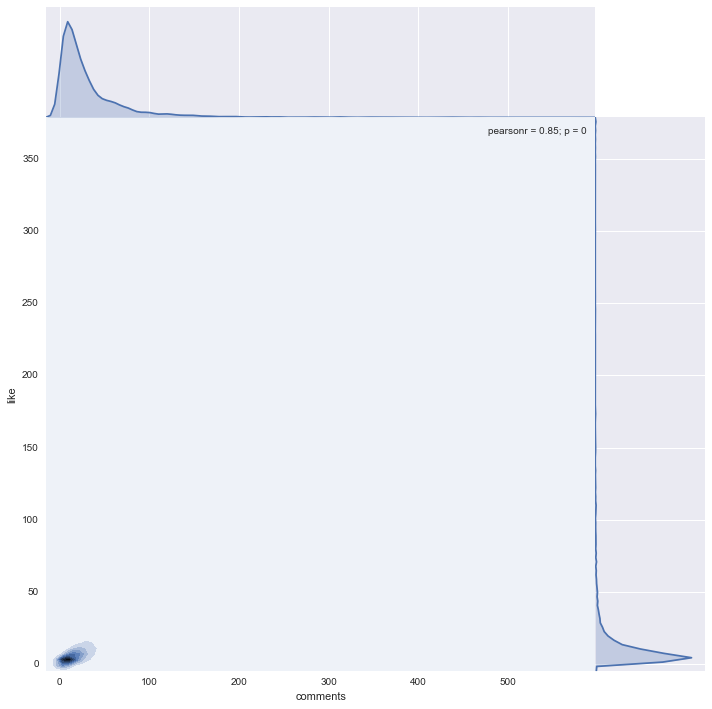

In [8]:
g = sns.jointplot(temp.comments, temp.like, kind="kde", size=10, space=0)

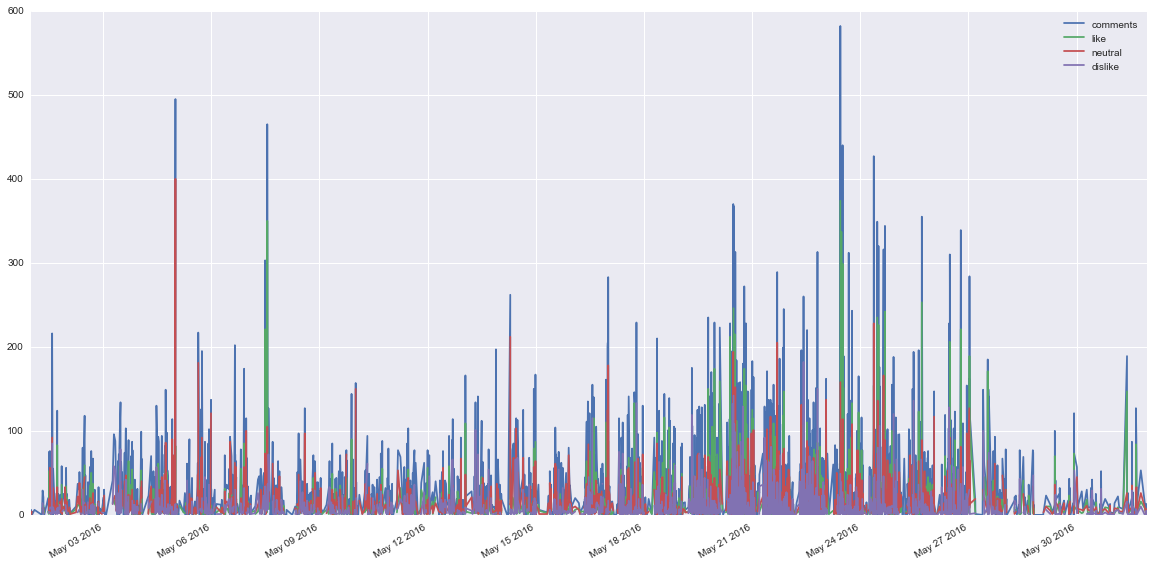

In [9]:
stat_ptt = pd.concat([ptt_df.comments, ptt_df.like, ptt_df.neutral,ptt_df.dislike],axis=1)
stat_ptt.plot(figsize=(20,10))

In [10]:
import plotly.plotly as py
import plotly.graph_objs as go 

from datetime import datetime
import pandas.io.data as web

py.sign_in('Henrilin28', 'u4ygat92mn')

/Users/Henrilin28/.pyenv/versions/KyperData/lib/python3.5/site-packages/pandas/io/data.py:35: FutureWarning:


The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.



In [11]:
trace = go.Scatter(x=temp.timestamp,
                   y=temp.comments)

trace1 = go.Scatter(x=temp.timestamp,
                   y=temp.like)

trace2 = go.Scatter(x=temp.timestamp,
                   y=temp.neutral)

trace3 = go.Scatter(x=temp.timestamp,
                   y=temp.dislike)


data = [trace,trace1,trace2,trace3]

layout = dict(
    title='Time series with range slider and selectors',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig)

In [12]:
## daily data 
daily_ptt = ptt_df.resample('D', how='sum')
daily_ptt.head()

/Users/Henrilin28/.pyenv/versions/KyperData/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).sum()



,comments,like,neutral,dislike
2016-05-01,1432,581.0,616.0,280.0
2016-05-02,1416,603.0,551.0,252.0
2016-05-03,2217,778.0,882.0,552.0
2016-05-04,2591,836.0,1310.0,449.0
2016-05-05,2623,687.0,1489.0,454.0


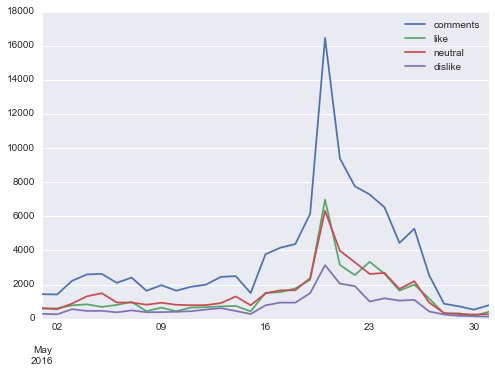

In [13]:
daily_ptt.plot()

In [14]:
trace = go.Scatter(name='Comments', x=daily_ptt.index,
                   y=daily_ptt.comments)

trace1 = go.Scatter(name='like',x=daily_ptt.index,
                   y=daily_ptt.like)

trace2 = go.Scatter(name='neutral',x=daily_ptt.index,
                   y=daily_ptt.neutral)

trace3 = go.Scatter(name='dislike', x=daily_ptt.index,
                   y=daily_ptt.dislike)


data = [trace,trace1,trace2,trace3]

layout = dict(
    title='Daily Time series with range slider and selectors',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig)

In [15]:
def plot_time_series_all(termm, startdate, enddate):
    
    ptt_df = search_ptt(search_term=termm, start_date=startdate, end_date=enddate)
    daily_ptt = ptt_df.resample('D', how='sum')
    
    trace = go.Scatter(x=daily_ptt.index,
                   y=daily_ptt.comments)

    trace1 = go.Scatter(x=daily_ptt.index,
                       y=daily_ptt.like)

    trace2 = go.Scatter(x=daily_ptt.index,
                       y=daily_ptt.neutral)

    trace3 = go.Scatter(x=daily_ptt.index,
                       y=daily_ptt.dislike)


    data = [trace,trace1,trace2,trace3]

    layout = dict(
        title='Daily Time series with range slider and selectors',
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label='1m',
                         step='month',
                         stepmode='backward'),
                    dict(count=6,
                         label='6m',
                         step='month',
                         stepmode='backward'),
                    dict(count=1,
                        label='YTD',
                        step='year',
                        stepmode='todate'),
                    dict(count=1,
                        label='1y',
                        step='year',
                        stepmode='backward'),
                    dict(step='all')
                ])
            ),
            rangeslider=dict(),
            type='date'
        )
    )

    fig = dict(data=data, layout=layout)
    py.iplot(fig)

In [16]:
ptt_df_ma = search_ptt(search_term="馬英九", start_date="2016-05-01", end_date="2016-06-01")

In [17]:
daily_ptt = ptt_df_ma.groupby("board").resample('D', how='count')

/Users/Henrilin28/.pyenv/versions/KyperData/lib/python3.5/site-packages/pandas/core/groupby.py:1082: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).count()



In [18]:
daily_ptt = daily_ptt.fillna(value=0)

In [19]:
daily_ptt = ptt_df_ma.groupby("board").resample('D', how='sum').sort("comments",ascending=False)

/Users/Henrilin28/.pyenv/versions/KyperData/lib/python3.5/site-packages/pandas/core/groupby.py:1082: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).sum()

/Users/Henrilin28/.pyenv/versions/KyperData/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



In [20]:
comments_daily = ptt_df_ma.pivot(columns='board', values='comments').fillna(value=0).resample("D",how="sum")

/Users/Henrilin28/.pyenv/versions/KyperData/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).sum()



In [21]:

data = [] 
name = ["Gossiping","HatePolitics","LoL"] 


for bo in name:
    x = comments_daily.index
    y = comments_daily[bo]
    data.append(go.Bar(x=x,y=y,name= bo))
    
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [25]:
neutral_daily = ptt_df_ma.pivot(columns='board', values='neutral').fillna(value=0).resample("D",how="sum")
data = [] 
name = ["Gossiping","HatePolitics","LoL"] 


for i,bo in enumerate(name):
    t = list(neutral_daily.index.strftime("%m/%d"))
    y_list = []
    for k in range(0,len(t)):
        y_list.append (i+1)
    data.append(go.Scatter(x=t,y=y_list,text=["size: "+str(int(num)) for num in list(neutral_daily[bo])],
                           mode='markers',marker=dict(size=list(neutral_daily[bo]),
                                                                   sizeref=.2,sizemode='area'),name = bo))

py.iplot(data, filename='bubblechart-size-ref-ma')

/Users/Henrilin28/.pyenv/versions/KyperData/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).sum()

